RSI strategy

In [55]:
import pandas as pd
import vectorbt as vbt
import yfinance as yf

def rsi_backtest(coin):
    coin_price = vbt.YFData.download(coin, missing_index='drop').get("Close")
    coin_rsi = vbt.RSI.run(coin_price)
    entries = coin_rsi.rsi_crossed_below(30)
    exits = coin_rsi.rsi_crossed_above(70)

    # set up portfolio
    pf = vbt.Portfolio.from_signals(coin_price, entries, exits)
    ret = pf.total_return()
    sr = pf.sharpe_ratio()
    max_drawdown = pf.max_drawdown()
    num_trades = pf.stats()[11]
    percent_avg_win_trades = pf.stats()[18]
    percent_avg_loss_trades = pf.stats()[19]
    metrics = {"portfolio": pf, "Return": ret, "Number of trades": num_trades,
               "Winning trades (%)": percent_avg_win_trades,
               "Losing trades (%)": percent_avg_loss_trades,
              "Max drawdown": max_drawdown, "Sharpe ratio": sr}
    return metrics

Date
2014-09-17 00:00:00+00:00      457.334015
2014-09-18 00:00:00+00:00      424.440002
2014-09-19 00:00:00+00:00      394.795990
2014-09-20 00:00:00+00:00      408.903992
2014-09-21 00:00:00+00:00      398.821014
                                 ...     
2022-10-08 00:00:00+00:00    19416.568359
2022-10-09 00:00:00+00:00    19446.425781
2022-10-10 00:00:00+00:00    19141.484375
2022-10-11 00:00:00+00:00    19051.417969
2022-10-12 00:00:00+00:00    19085.759766
Freq: D, Name: Close, Length: 2948, dtype: float64


The following are the metrics needed for this project: 
 Return
 Number of trades
 Winning trades
 Losing trades
 Max drawdown
 Sharpe ratio

In [88]:
def rsi_backtest(coin):
    coin_price = vbt.YFData.download(coin, missing_index='drop').get("Close")
    coin_rsi = vbt.RSI.run(coin_price)
    entries = coin_rsi.rsi_crossed_below(30)
    exits = coin_rsi.rsi_crossed_above(70)

    # set up portfolio
    pf = vbt.Portfolio.from_signals(coin_price, entries, exits)
    ret = pf.total_return()
    sr = pf.sharpe_ratio()
    max_drawdown = pf.max_drawdown()
    num_trades = pf.stats()[11]
    percent_avg_win_trades = pf.stats()[18]
    percent_avg_loss_trades = pf.stats()[19]
    metrics = {"Return": ret, 
               "Number of trades": num_trades,
               "Winning trades (%)": percent_avg_win_trades,
               "Losing trades (%)": percent_avg_loss_trades,
              "Max drawdown": max_drawdown, "Sharpe ratio": sr}
    return metrics, pf
    
    
eth = rsi_backtest("ETH-USD")

Return  =>  -0.8672191208011932
Number of trades  =>  19
Winning trades (%)  =>  14.95548416992863
Losing trades (%)  =>  -27.077189061540352
Max drawdown  =>  -0.9428024607794175
Sharpe ratio  =>  -0.3192122655827195


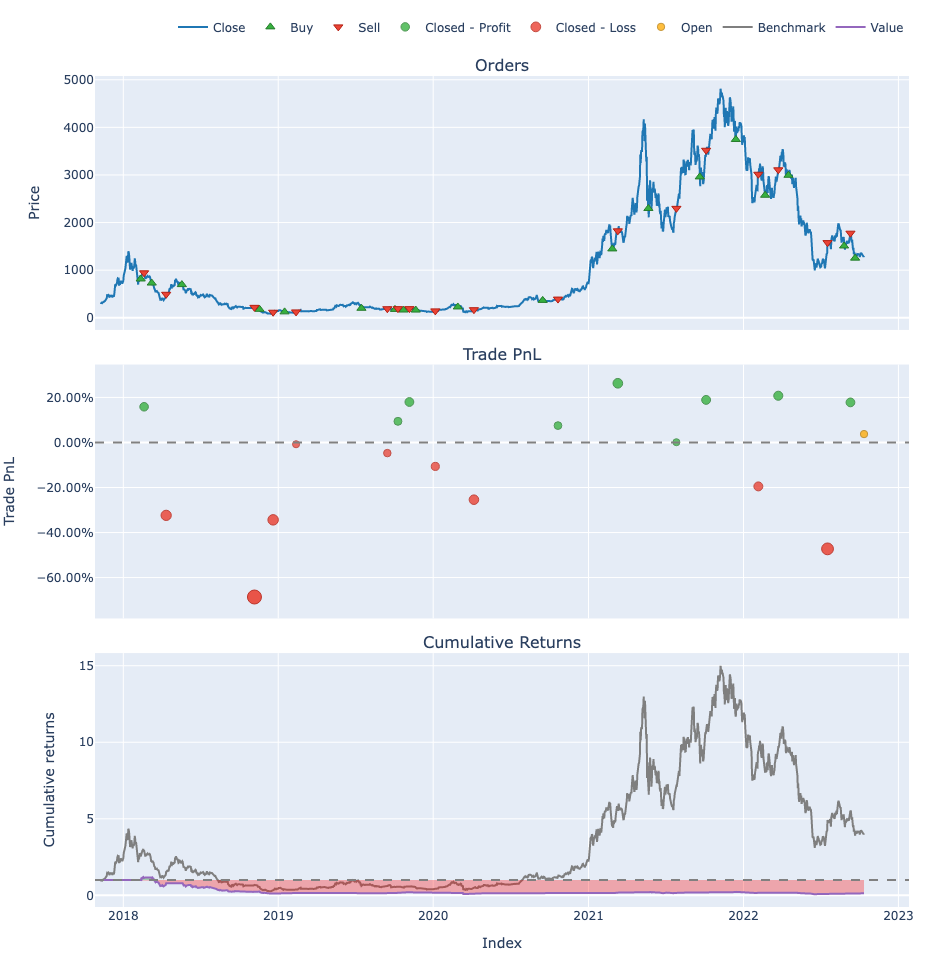

In [97]:
def plot_pf(met):
    mets = met[0]
    for key,value in mets.items():
        print(key, " => ", value)
    met[1].plot().show()
    
plot_pf(eth)